# Exercise 3:  Cross-validation as resampling techniques, adding more complexity (score 15 points)


### Exercise 3:  Cross-validation as resampling techniques, adding more complexity (score 15 points)

The aim here is to write your own code for another widely popular
resampling technique, the so-called cross-validation method.  Again,
before you start with cross-validation approach, you should scale your
data.

Implement the $k$-fold cross-validation algorithm (write your own
code) and evaluate again the MSE function resulting
from the test folds. You can compare your own code with that from
**Scikit-Learn** if needed. 

Compare the MSE you get from your cross-validation code with the one
you got from your **bootstrap** code. Comment your results. Try $5-10$
folds.  You can also compare your own cross-validation code with the
one provided by **Scikit-Learn**.


X.shape: (400, 21)
y_test.shape: (80,), y_pred.shape = (80,)
y_test.shape: (80,), y_pred.shape = (80,)
y_test.shape: (80,), y_pred.shape = (80,)
y_test.shape: (80,), y_pred.shape = (80,)
y_test.shape: (80,), y_pred.shape = (80,)


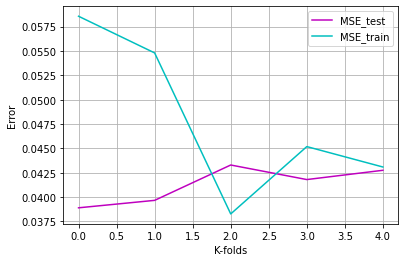

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
import common
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from typing import Tuple

np.random.seed(4155)

# Generate the data.
n = 400
x = np.sort(np.random.uniform(0, 1, n))
y = np.sort(np.random.uniform(0, 1, n))
z = common.FrankeFunction(x, y) + 0.2*np.random.normal(0, size = n)
#scale data !!
degree = 5
X = common.create_X(x, y, n=degree)  
print(f"X.shape: {X.shape}")  

def cross_val(k_folds: int, x_data:np.ndarray, y_data:np.ndarray, model= LinearRegression())-> Tuple[list, list]:
    """Function for resampling with cross validation 

    Args:
        k_folds (int): Number of k_folds
        x_data (np.ndarray): Feature matrix
        y_data (np.ndarray): Target values
        model ([type], optional): [description]. Defaults to LinearRegression().

    Returns:
        Tuple[list, list]: MSE_train, MSE_test
    """
    MSE_test = np.zeros(k_folds)
    MSE_train = np.zeros(k_folds)
    inds = np.arange(n)
    #shuffle indicies to create a random folds: 
    np.random.shuffle(inds)
    #split inds into multiple sub-arrays of equal or aprox equal size: 
    fold_inds = np.array_split(inds, k_folds)
    
    for k in range(k_folds):
        #get array elements at indx k from folds_inds and use as test data: 
        x_test = x_data[fold_inds[k],:]
        y_test = y_data[fold_inds[k]]
       # print(f"x_test.shape: {x_test.shape}")

        #create training data by removing test-indicies from data
        x_train = np.delete(arr = x_data, obj = fold_inds[k],axis = 0)
        
        # Scale data: 
        
        scaler = StandardScaler()
        scaler.fit(x_train)
        x_train_scaled = scaler.transform(x_train)
        x_test_scaled = scaler.transform(x_test)
       # print(f"x_train.shape: {x_train.shape}")
        y_train = np.delete(y_data, fold_inds[k])
        
        clf =  model.fit(x_train_scaled, y_train)
        #fit model and predict on test data:
        y_pred = clf.predict(x_test_scaled)
        #predict on train data:
        y_fit = clf.predict(x_train_scaled)
        print(f"y_test.shape: {y_test.shape}, y_pred.shape = {y_pred.shape}")
        
        MSE_test[k] = np.mean((y_test - y_pred)**2) 
        MSE_train[k] = np.mean((y_train - y_fit)**2) 
    
    return MSE_train, MSE_test
     
        

if __name__ == "__main__":
    k_folds = 5
    MSE_test, MSE_train = cross_val(k_folds=k_folds, x_data= X,y_data=z)
    plt.plot(np.arange(k_folds), MSE_test,"m", label='MSE_test')
    plt.plot(np.arange(k_folds), MSE_train,"c", label='MSE_train')

    plt.xlabel("K-folds")
    plt.ylabel("Error")

    plt.grid(True)
    plt.legend()
    plt.show()
    